In [1]:
import pandas as pd
import numpy as np
import random
import sys
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

#Clustering imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
#SKLEARN CLUSTERING TOOLS: https://scikit-learn.org/stable/modules/clustering.html


In [2]:
#Loading Data from train.csv file
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv (r'/content/drive/MyDrive/ChexpertCSV/train.csv')
df = df.replace('Female',1)
df = df.replace('Male',-1)
df = df.replace(np.nan,0)
df = df.replace('Frontal',1)
df = df.replace('LL',-2)
df = df.replace('RL',-3)
df = df.replace('Lateral',-1)
df = df.replace('AP',1)
df = df.replace('PA',1)
df = df.replace('Unknown',0)
df = df.drop(labels=['Path','Sex','Age','Frontal/Lateral', 'AP/PA'], axis=1)
df.head()

scaler = StandardScaler()
model = scaler.fit(df)
data = model.transform(df)

S=df.shape
nrows = S[0]
ncols = S[1]
print (df)

Mounted at /content/drive
        No Finding  Enlarged Cardiomediastinum  Cardiomegaly  Lung Opacity  \
0              1.0                         0.0           0.0           0.0   
1              0.0                         0.0          -1.0           1.0   
2              0.0                         0.0           0.0           1.0   
3              0.0                         0.0           0.0           1.0   
4              0.0                         0.0           0.0           0.0   
...            ...                         ...           ...           ...   
223409         0.0                         0.0           0.0          -1.0   
223410         0.0                         0.0           0.0          -1.0   
223411         0.0                         0.0           0.0           0.0   
223412         0.0                         0.0           1.0           1.0   
223413         1.0                         0.0           0.0           0.0   

        Lung Lesion  Edema  Consolida

In [3]:
PERCENT = [0.25,0.5,0.75]
LIST = [];
for percent in PERCENT:
  List = []
  #percent = 0.25;#How much of the dataset do we consider for clustering
  dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

  NCLUSTERS = [5, 50, 100, 150, 175, 200, 225, 250]
  for nclusters in NCLUSTERS:
    print("Round ", nclusters, " with max round being 250 (percent =",percent,")")
    mixt = KMeans(n_clusters=nclusters, init='k-means++', random_state=0).fit(dfsample)
    labels = (df).columns
    A=mixt.predict(dfsample)
    ind=0;
    S = [[] for i in range(np.max(A)+1)]
    for i in dfsample.iloc():
      c = A[ind]
      ind +=1
      S[c].append(i)

    liste = []
    for s in S:
      n = len(s);
      liste.append(n)
    List.append(liste.copy())

  LIST += [List.copy()];

Round  5  with max round being 250 (percent = 0.25 )
Round  50  with max round being 250 (percent = 0.25 )
Round  100  with max round being 250 (percent = 0.25 )
Round  150  with max round being 250 (percent = 0.25 )
Round  175  with max round being 250 (percent = 0.25 )
Round  200  with max round being 250 (percent = 0.25 )
Round  225  with max round being 250 (percent = 0.25 )
Round  250  with max round being 250 (percent = 0.25 )
Round  5  with max round being 250 (percent = 0.5 )
Round  50  with max round being 250 (percent = 0.5 )
Round  100  with max round being 250 (percent = 0.5 )
Round  150  with max round being 250 (percent = 0.5 )
Round  175  with max round being 250 (percent = 0.5 )
Round  200  with max round being 250 (percent = 0.5 )
Round  225  with max round being 250 (percent = 0.5 )
Round  250  with max round being 250 (percent = 0.5 )
Round  5  with max round being 250 (percent = 0.75 )
Round  50  with max round being 250 (percent = 0.75 )
Round  100  with max round 

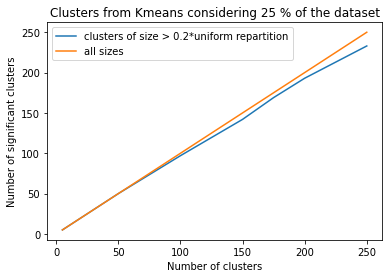

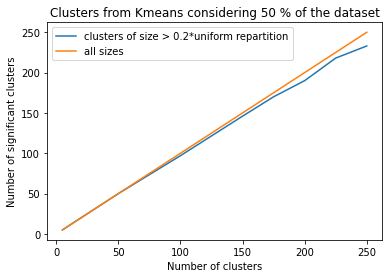

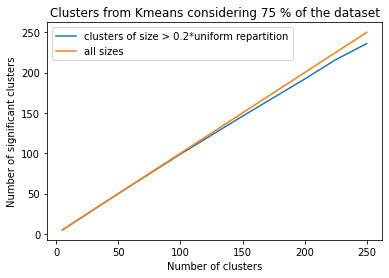

In [4]:
SIZZ = []
indd = 0
for Llist in LIST:

  Sizz = [0 for i in NCLUSTERS];
  ind = 0
  #print('\n',indd)
  for L in Llist:
    for l in L:
      #print(223414*PERCENT[indd]/NCLUSTERS[ind]*0.2)
      if l>(223414*PERCENT[indd]/NCLUSTERS[ind]*0.2): #TOTAL NUMBER OF FEATURES CONSIDERED / TOTAL NUMBER OF CLUSTERS * MINIMUM SIZE IN REGARD TO UNIFORM DISTRIBUTION OVER ALL CLUSTERS
        Sizz[ind]+=1                                  # Note that the dataset might not represent all classes at the same rate, so you want to keep the minimum size pretty low...
    ind += 1
  SIZZ += [Sizz.copy()]

  plt.plot(NCLUSTERS,Sizz,NCLUSTERS,NCLUSTERS)
  plt.legend(["clusters of size > 0.2*uniform repartition", "all sizes"])
  plt.title("Clusters from Kmeans considering %i %% of the dataset" % (100*PERCENT[indd]))
  plt.xlabel("Number of clusters")
  plt.ylabel("Number of significant clusters")
  plt.show()
  indd += 1

In [5]:
A=mixt.predict(dfsample)
ind=0;
S = [[] for i in range(np.max(A)+1)]
for i in dfsample.iloc():
  c = A[ind]
  ind +=1
  S[c].append(i)

# Each attribute we'll plot in the radar chart.
labels = (df).columns


# Let's look at cluster...
ind = 0;
for s in S:
  ind += 1
  if ind%4==0:
    summ = np.sum(s,0)
    values = summ / np.linalg.norm(summ)

    # Number of variables we're plotting.
    num_vars = len(labels)-1

    # Split the circle into even parts and save the angles
    # so we know where to put each axis.
    angles = np.linspace(0, 2 * np.pi, num_vars+1, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop"
    # and append the start value to the end.
    values += values[:1]
    angles += angles[:1]

    # ax = plt.subplot(polar=True)
    #fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.set_xticks(angles)
    ax.set_xticklabels(labels.tolist())
    ax.set_rmin(-1)
    ax.set_rmax(1)
    # Draw the outline of our data.
    ax.plot(angles[:-1], values, color='red', linewidth=1)
    # Fill it in.
    ax.fill(angles[:-1], values, color='red', alpha=0.25)
    strg = ["cluster ",ind]
    plt.title(strg)

Output hidden; open in https://colab.research.google.com to view.